In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("DailyClimateTrain.csv")
test_df = pd.read_csv("DailyClimateTest.csv")
len(train_df), len(test_df)

(1462, 114)

In [3]:
train_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
test_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


### Let's draw few graph for predicting the Temp.

In [5]:
fig = px.line(
    train_df,
    x = 'date',
    y = 'meantemp',
    title = "Mean Temp. over the Years"
)
fig.update_traces(line_color='red')
fig.show()

In [6]:
fig = px.line(
    train_df,
    x = 'date',
    y = 'humidity',
    title = "Humidity over the Years"
)
fig.update_traces(line_color='lightblue')
fig.show()

In [7]:
fig = px.line(
    train_df,
    x = 'date',
    y = 'wind_speed',
    title = "Wind Speed over the Years"
)
fig.update_traces(line_color='green')
fig.show()

In [8]:
fig = px.line(
    train_df,
    x = 'date',
    y = 'meanpressure',
    title = "Wind Speed over the Years"
)
fig.update_traces(line_color='violet')
fig.show()

## Relation between Temp.  & Humidity

In [9]:
figure = px.scatter(data_frame = train_df, x="humidity",
                    y="meantemp", size="meantemp", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

### Analyzing Temperature Change

In [10]:
train_df.date.dtype
train_df['date'] = pd.to_datetime(train_df.date, format = '%Y-%m-%d')
train_df.date

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: date, Length: 1462, dtype: datetime64[ns]

In [11]:
train_df['year'] = train_df.date.dt.year
train_df['month'] = train_df.date.dt.month
train_df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


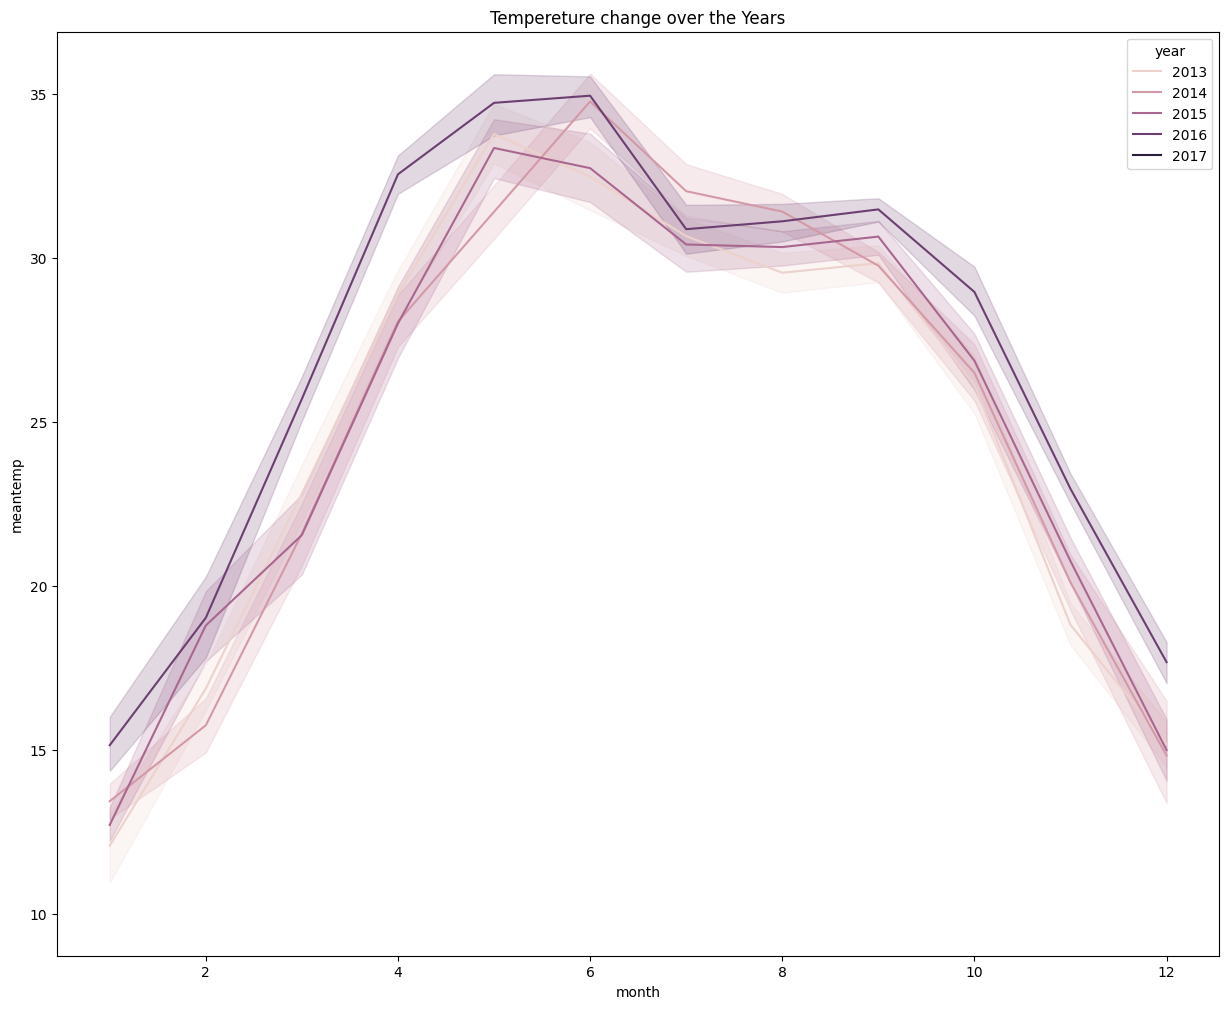

In [12]:
plt.figure(figsize=(15, 12))
plt.title("Tempereture change over the Years")
sns.lineplot(train_df, x='month', y='meantemp', hue='year')
plt.show()

### Conclusion: The temperature value depends humidity & wind speed

## Let's use the Facebook prophet model for weather forecasting

In [13]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [14]:
from prophet import Prophet

/home/hemantakumar/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



### The prophet model accepts time data named as “ds”, and labels as “y”. 
So let’s convert the data into this format

In [15]:
weather_data = train_df.rename(columns={"date":"ds", "meantemp":"y"})
weather_data.head()

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [16]:
model = Prophet()
model.fit(weather_data) 
future_df = model.make_future_dataframe(periods=2200) # periods refers to number of days
predictions = model.predict(future_df)

15:37:10 - cmdstanpy - INFO - Chain [1] start processing
15:37:11 - cmdstanpy - INFO - Chain [1] done processing


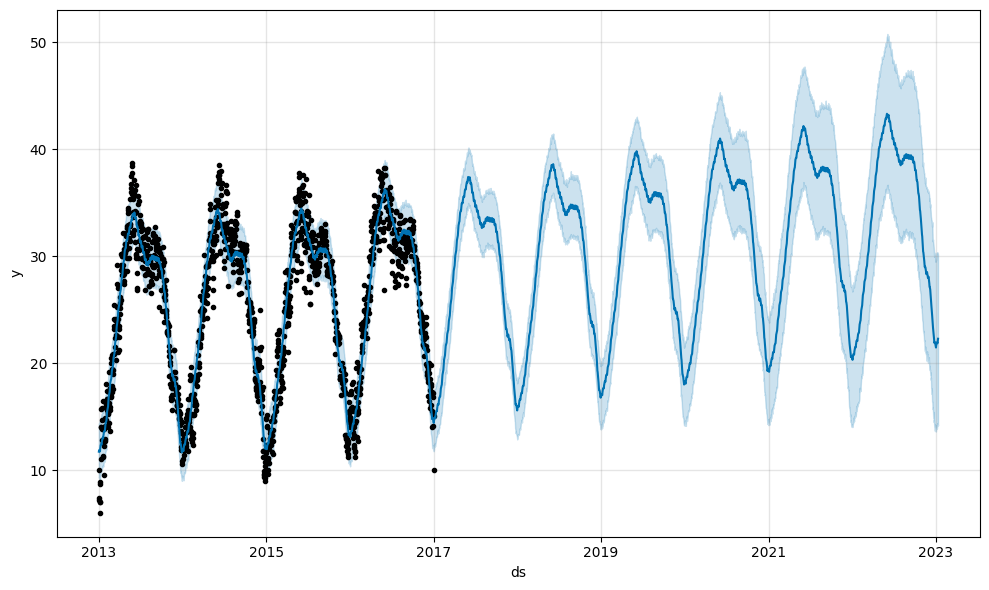

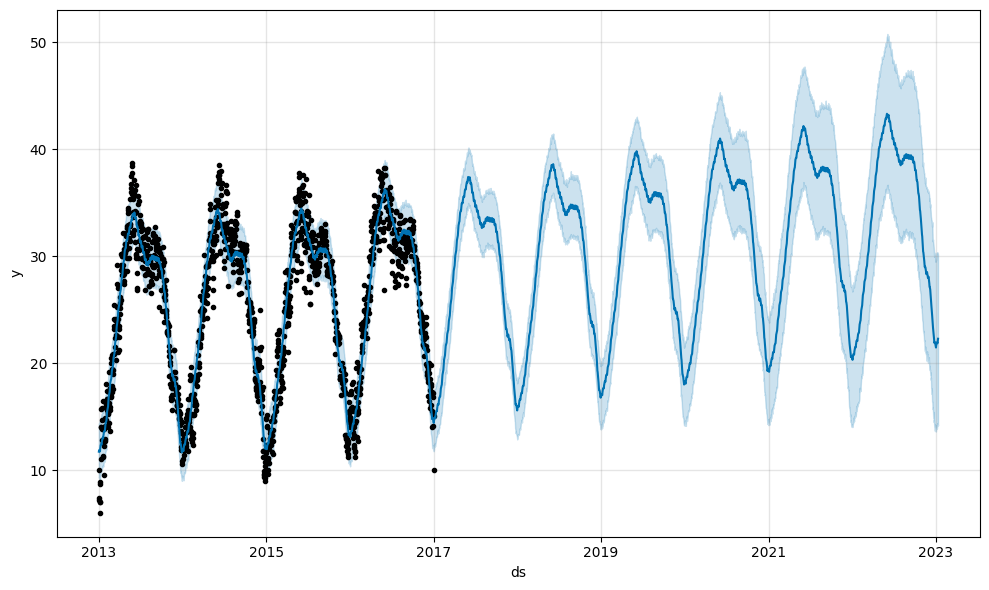

In [17]:
model.plot(predictions)

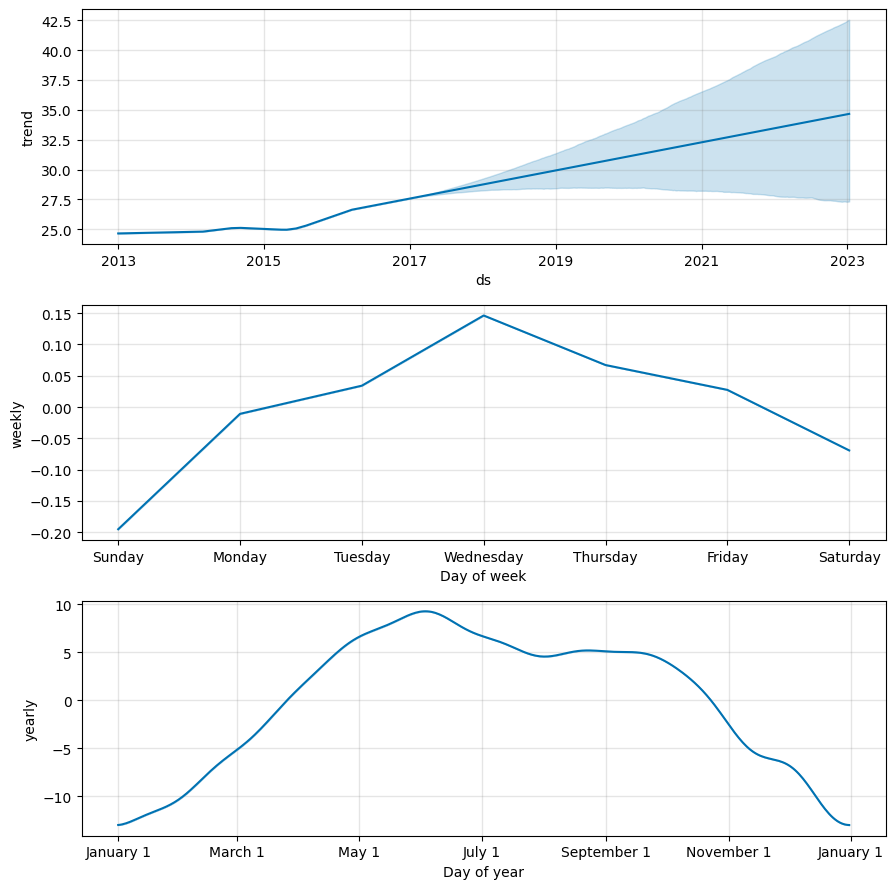

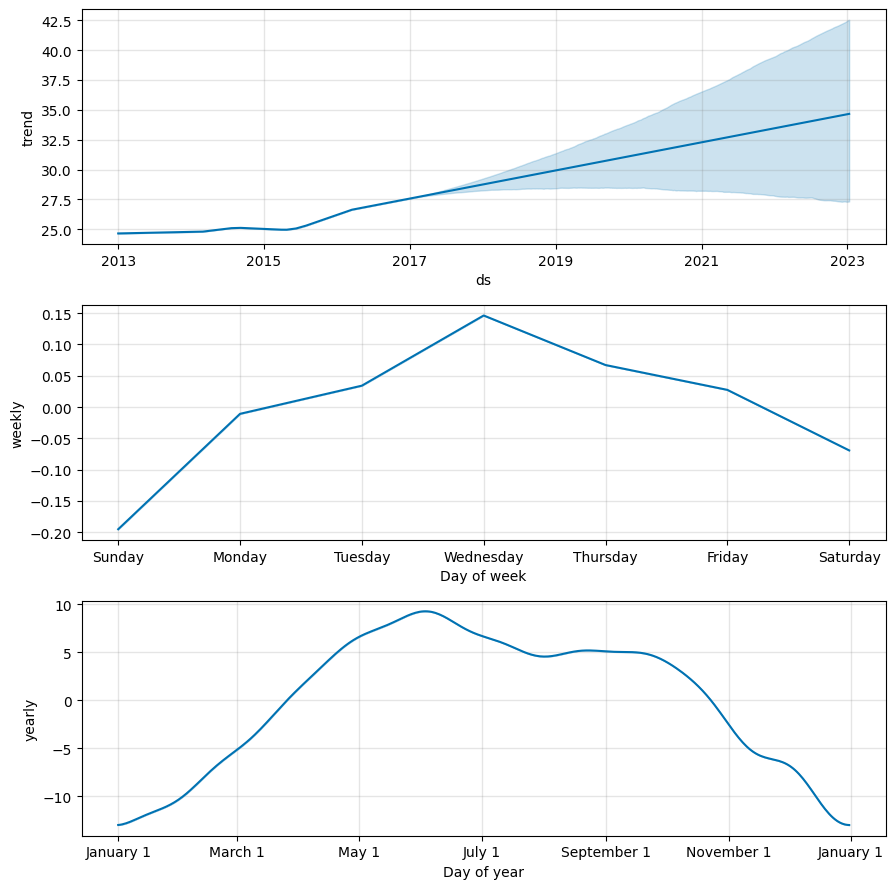

In [18]:
model.plot_components(predictions)

## Advanced interactive Graph

In [19]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, predictions)

In [20]:
plot_components_plotly(model, predictions)